<a href="https://colab.research.google.com/github/amalsalilan/GlucoSense_AI-Powered_Diabetes_Detection_for_Early_Intervention_Infosys_Internship_Oct2025/blob/Aswani/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.94      0.70      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



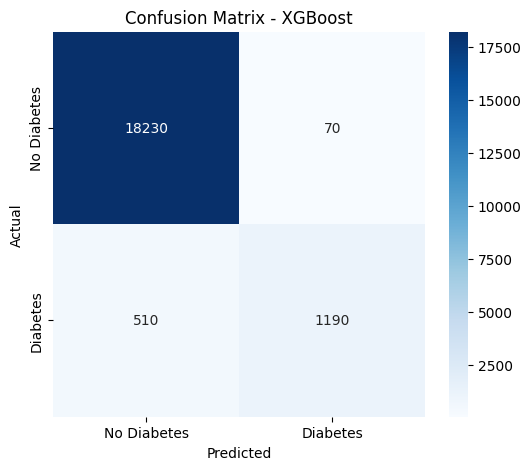

Training LightGBM...
[LightGBM] [Info] Number of positive: 6800, number of negative: 73200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.97      0.69      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.97      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



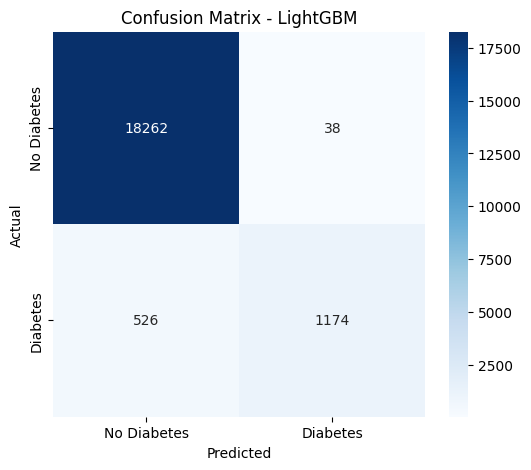

Training Weighted Logistic...

Weighted Logistic - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.43      0.89      0.58      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000



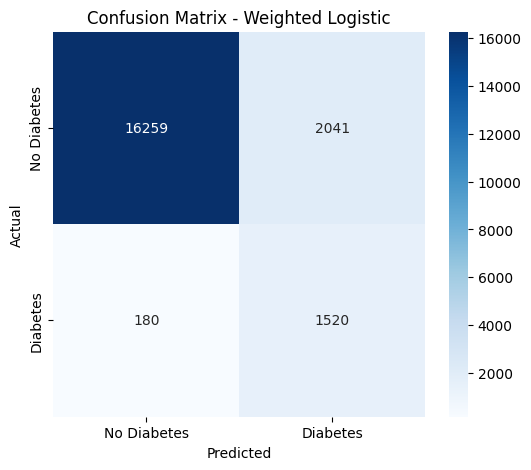

Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000



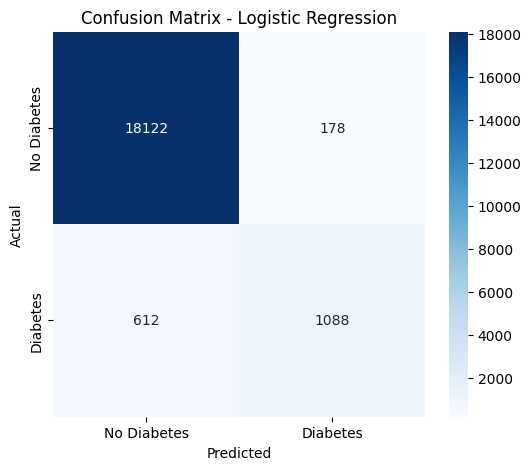

Training Decision Tree...

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.70      0.74      0.72      1700

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



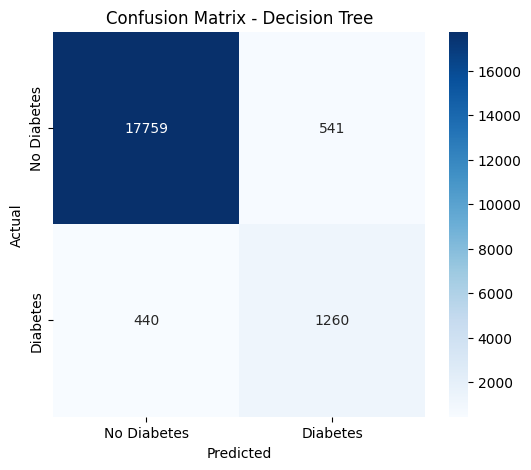

Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.95      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



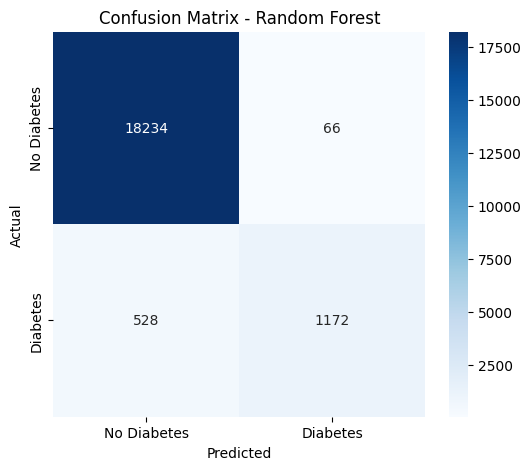

Training Gradient Boosting...

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.98      0.69      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



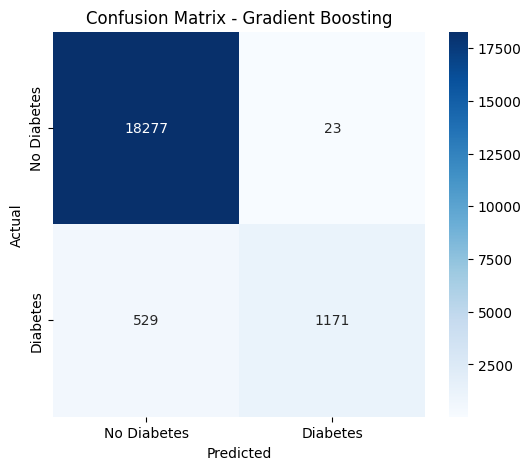

Training KNN...

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.88      0.62      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



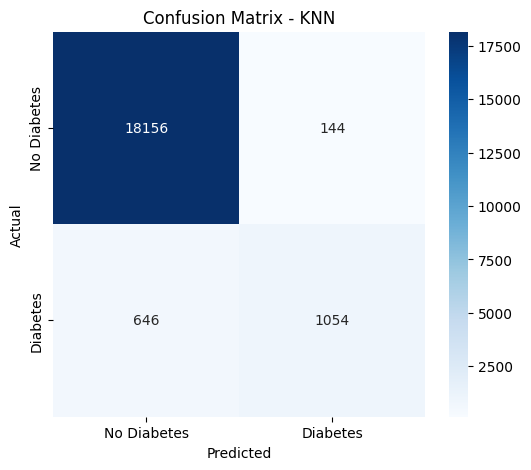

Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33     18300
           1       0.10      1.00      0.19      1700

    accuracy                           0.27     20000
   macro avg       0.55      0.60      0.26     20000
weighted avg       0.92      0.27      0.32     20000



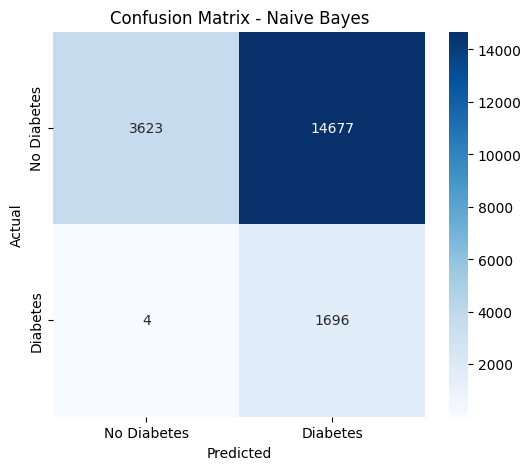

Best Model: Gradient Boosting with F1-Score: 0.8093
Best model saved successfully!


<ipython-input-7-16de842df4aa>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="viridis")


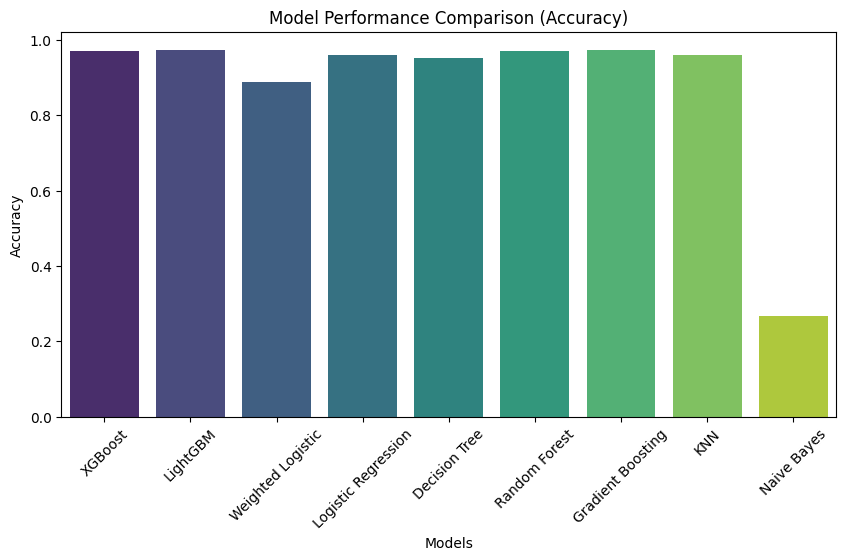

<Figure size 1000x500 with 0 Axes>

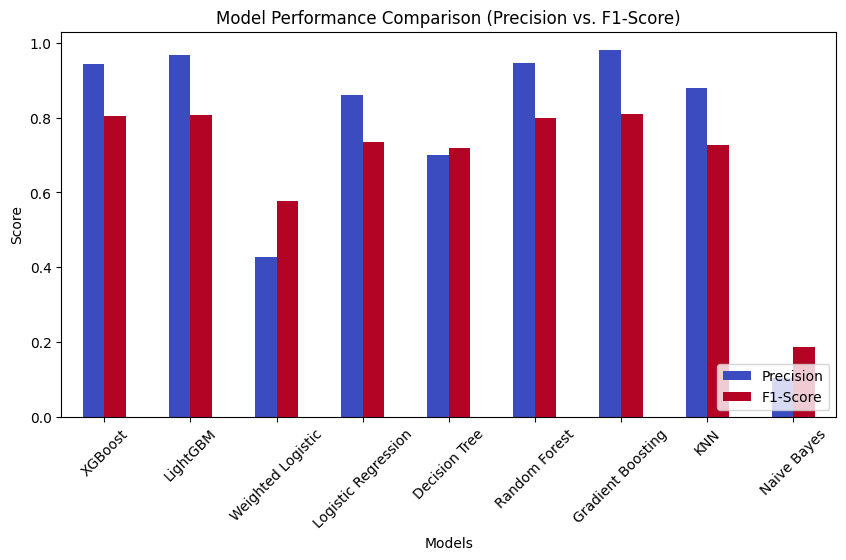

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving the best model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load Preprocessed Dataset
file_path = "/content/diabetes_prediction_dataset.csv"  # Change this if needed
df = pd.read_csv(file_path)
# Splitting Data into Features (X) and Target (y)
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

# Convert 'gender' and 'smoking_history' columns to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['gender', 'smoking_history'], drop_first=True) # drop_first to avoid multicollinearity # drop_first to avoid multicollinearity

# Splitting into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Define ML Models (without SVM)
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
    "Weighted Logistic": LogisticRegression(class_weight="balanced"),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Training and Evaluating Models
model_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}

    # Print classification report
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print("=" * 50)

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(model_results).T

# Identify Best Model Based on F1-Score
best_model_name = results_df["F1-Score"].idxmax()
best_model = models[best_model_name]

# Print Best Model
print(f"Best Model: {best_model_name} with F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")

# Save the Best Model
joblib.dump(best_model, "best_diabetes_prediction_model.pkl")
print("Best model saved successfully!")

# Plot Model Accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison (Accuracy)")
plt.show()

# Plot Precision vs. F1-Score
plt.figure(figsize=(10, 5))
results_df[["Precision", "F1-Score"]].plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison (Precision vs. F1-Score)")
plt.legend(loc="lower right")
plt.show()
